In [1]:
#In this world happiness report data, we explore the correlation between different life aspects which cumulatively represent the wellbeing of humans. 
#We would like to establish the dependencies between different life aspects and how countries rank basing on these aspects.
#we will first look at the bigger picture by looking at how regions rank basing on the different aspects.
#then we will narrow down to the african region and finally to East Africa.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading in data
dfr = pd.read_csv('world_happiness_report_2021.csv')

In [4]:
dfr.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
#EDA

In [6]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
dfr.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [8]:
#let us look at the specific core aspects that we will be analyzing henceforth.

In [9]:
#regional logged gdp per capita
regional_data = dfr.groupby(['Regional indicator'])['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'].mean()
regional_data

C:\Users\hp\AppData\Local\Temp/ipykernel_2396/3110614956.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regional_data = dfr.groupby(['Regional indicator'])['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'].mean()


,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Regional indicator,,,,,,
Central and Eastern Europe,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529
Commonwealth of Independent States,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083
East Asia,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333
Latin America and Caribbean,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600
Middle East and North Africa,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235
North America and ANZ,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250
South Asia,8.682571,0.703429,62.681000,0.765000,0.042714,0.797429
Southeast Asia,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111
Sub-Saharan Africa,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944


<AxesSubplot:>

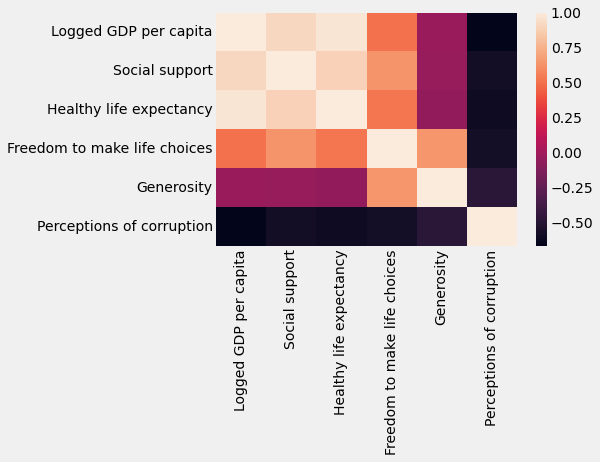

In [46]:
#let's look at regional correlation heatmap of the selcted aspects.
sns.heatmap(regional_data.corr())

In [10]:
dfr.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [11]:
#let us look at gdp
#grouped and sorted regional logged gdp per capita
regional_gdp = regional_data.groupby(['Regional indicator'])['Logged GDP per capita'].mean().sort_values(ascending=False).to_frame()
regional_gdp

,Logged GDP per capita
Regional indicator,
Western Europe,10.822714
North America and ANZ,10.809500
East Asia,10.367667
Central and Eastern Europe,10.109059
Middle East and North Africa,9.666118
Southeast Asia,9.421444
Commonwealth of Independent States,9.401833
Latin America and Caribbean,9.370000
South Asia,8.682571


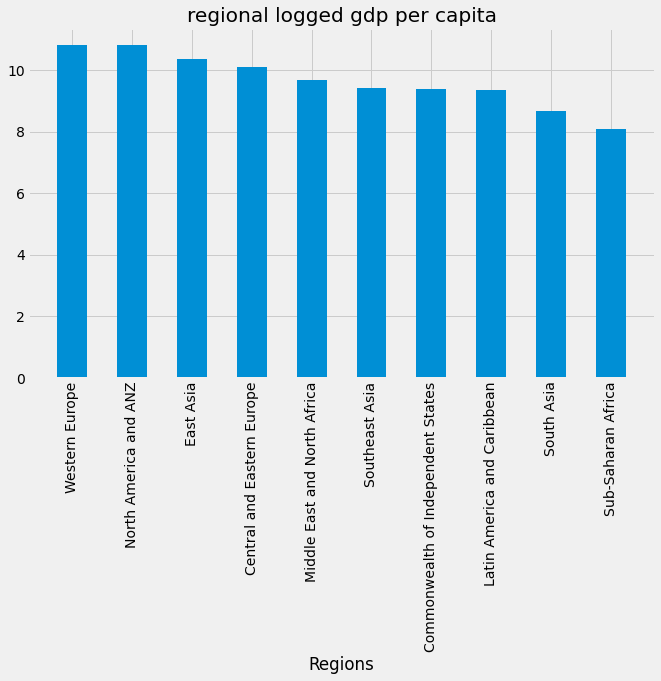

In [12]:
#a bar graph showing regional logged gdp per capita
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
region = regional_gdp.index
reg_gdp = regional_gdp['Logged GDP per capita']
plt.bar(region,reg_gdp, width=0.5)
#bar(x, y, width=30)
plt.xticks(region, rotation='vertical')
plt.title('regional logged gdp per capita')
plt.xlabel('Regions')
plt.show()

In [13]:
dfr.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [14]:
#looking at regional life expectancy

In [15]:
region_life_expectancy = dfr.groupby(['Regional indicator'])['Healthy life expectancy'].mean().sort_values(ascending=False).to_frame()
region_life_expectancy

,Healthy life expectancy
Regional indicator,
Western Europe,73.033095
North America and ANZ,72.325000
East Asia,71.252167
Central and Eastern Europe,68.338412
Latin America and Caribbean,67.076050
Middle East and North Africa,65.609118
Commonwealth of Independent States,65.009500
Southeast Asia,64.888444
South Asia,62.681000


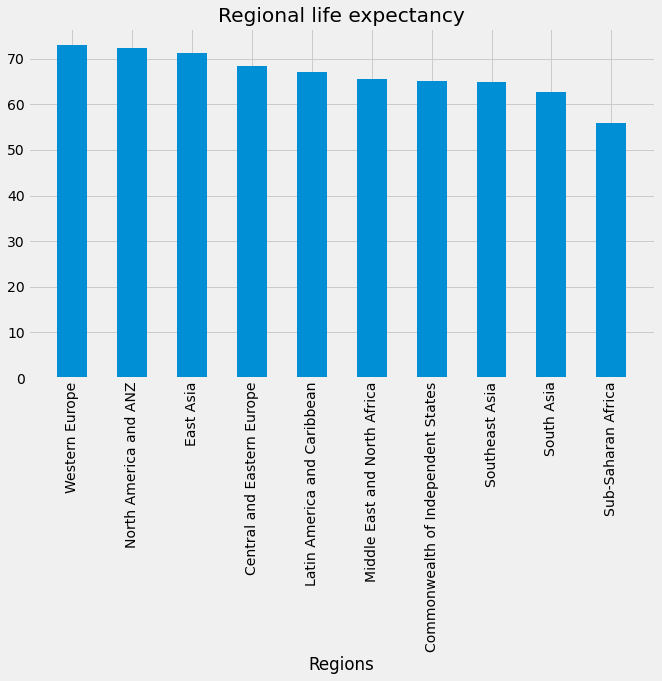

In [49]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
region = region_life_expectancy.index
reg_gdp = region_life_expectancy['Healthy life expectancy']
plt.bar(region,reg_gdp, width=0.5)
#bar(x, y, width=30)
plt.xticks(region, rotation='vertical')
plt.title('Regional life expectancy')
plt.xlabel('Regions')
plt.show()

In [17]:
#looking at sub_saharan logged gdp per capita
sub_sahara = dfr[dfr['Regional indicator'] == 'Sub-Saharan Africa'].sort_values(by='Logged GDP per capita',ascending=False)

In [18]:
dfr.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [19]:
#looking at social support
region_Social_support = dfr.groupby(['Regional indicator'])['Social support'].mean().sort_values(ascending=False).to_frame()
region_Social_support

,Social support
Regional indicator,
North America and ANZ,0.933500
Western Europe,0.914476
Central and Eastern Europe,0.887412
Commonwealth of Independent States,0.872500
East Asia,0.860500
Latin America and Caribbean,0.839500
Southeast Asia,0.820333
Middle East and North Africa,0.797647
South Asia,0.703429


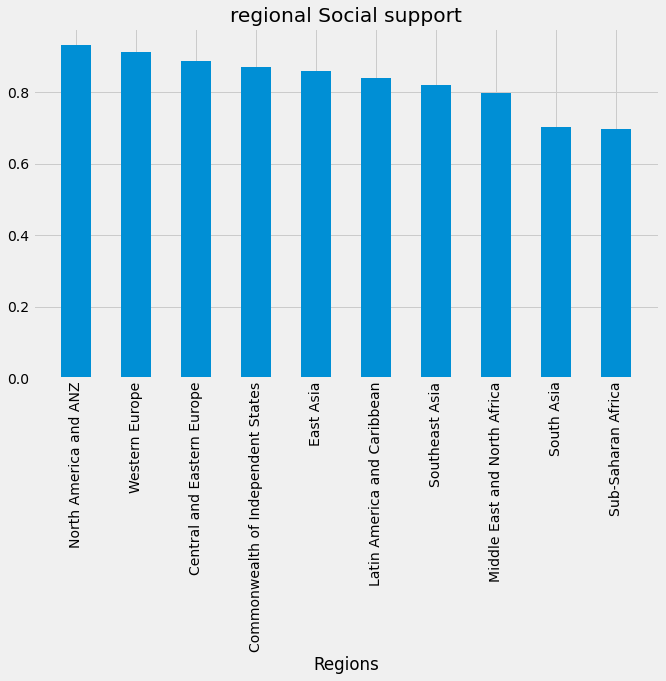

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
region = region_Social_support.index
reg_gdp = region_Social_support['Social support']
plt.bar(region,reg_gdp, width=0.5)
#bar(x, y, width=30)
plt.xticks(region, rotation='vertical')
plt.title('regional Social support')
plt.xlabel('Regions')
plt.show()

In [21]:
#looking at perception of corruption
region_corrutpion = dfr.groupby(['Regional indicator'])['Perceptions of corruption'].mean().sort_values(ascending=False).to_frame()
region_corrutpion

,Perceptions of corruption
Regional indicator,
Central and Eastern Europe,0.850529
South Asia,0.797429
Latin America and Caribbean,0.792600
Sub-Saharan Africa,0.765944
Middle East and North Africa,0.762235
Commonwealth of Independent States,0.725083
Southeast Asia,0.709111
East Asia,0.683333
Western Europe,0.523095


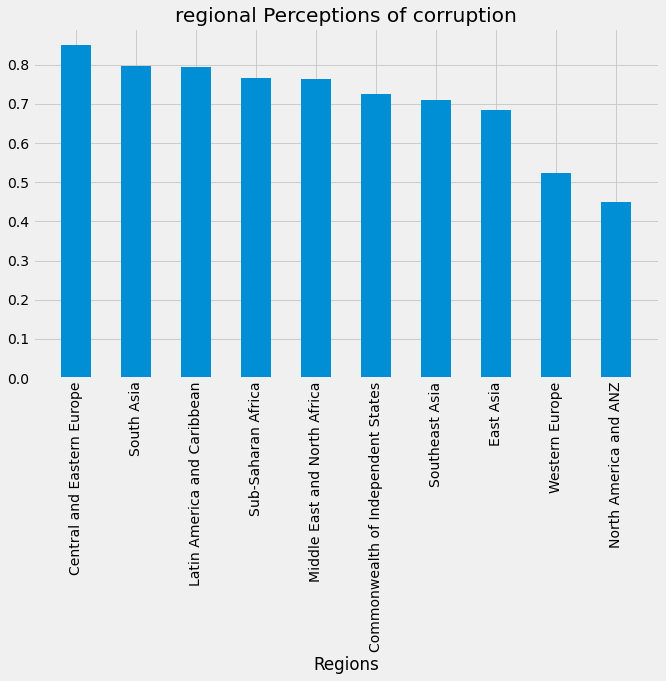

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
region = region_corrutpion.index
reg_gdp = region_corrutpion['Perceptions of corruption']
plt.bar(region,reg_gdp, width=0.5)
#bar(x, y, width=30)
plt.xticks(region, rotation='vertical')
plt.title('regional Perceptions of corruption')
plt.xlabel('Regions')
plt.show()

In [23]:
#let us take a quick look at sub-saharan Africa
sub_sahara

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
49,Mauritius,Sub-Saharan Africa,6.049,0.059,6.165,5.933,10.008,0.905,66.701,0.867,-0.054,0.789,2.43,1.178,0.996,0.574,0.590,0.153,0.096,2.462
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
111,Gabon,Sub-Saharan Africa,4.852,0.075,4.998,4.706,9.603,0.776,59.962,0.731,-0.200,0.840,2.43,1.037,0.707,0.362,0.424,0.058,0.064,2.201
102,South Africa,Sub-Saharan Africa,4.956,0.060,5.074,4.839,9.403,0.860,56.904,0.749,-0.067,0.860,2.43,0.967,0.895,0.265,0.447,0.144,0.051,2.187
123,Namibia,Sub-Saharan Africa,4.574,0.064,4.700,4.448,9.161,0.818,56.799,0.719,-0.149,0.847,2.43,0.882,0.801,0.262,0.411,0.091,0.059,2.068
129,Swaziland,Sub-Saharan Africa,4.308,0.071,4.448,4.168,9.065,0.770,50.833,0.647,-0.185,0.708,2.43,0.849,0.693,0.074,0.323,0.067,0.147,2.155
94,Ghana,Sub-Saharan Africa,5.088,0.067,5.219,4.958,8.580,0.727,57.586,0.807,0.123,0.848,2.43,0.680,0.595,0.287,0.517,0.268,0.058,2.684
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,-0.016,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469
133,Mauritania,Sub-Saharan Africa,4.227,0.070,4.365,4.090,8.542,0.795,57.161,0.561,-0.106,0.731,2.43,0.666,0.749,0.273,0.218,0.119,0.133,2.069
115,Nigeria,Sub-Saharan Africa,4.759,0.052,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736


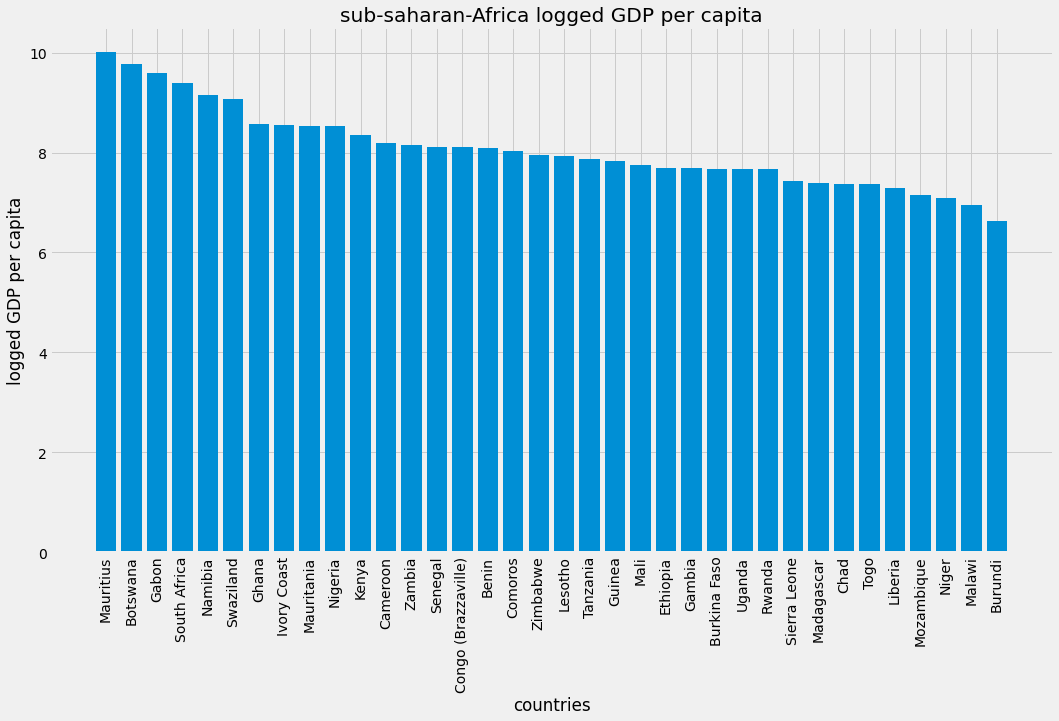

In [24]:
#a graph showing sub-saharan africa gdp
plt.style.use('fivethirtyeight')
country = sub_sahara['Country name']
lgdppc = sub_sahara['Logged GDP per capita']
plt.figure(figsize = (16,9))
plt.bar(country, lgdppc)
plt.title('sub-saharan-Africa logged GDP per capita')
plt.xlabel('countries')
plt.ylabel('logged GDP per capita')
plt.xticks(country, rotation='vertical')
plt.show()

In [25]:
#looking at middle east and north africa 
M_E_N_Af = dfr[dfr['Regional indicator'] == 'Middle East and North Africa'].sort_values(by='Logged GDP per capita',ascending=False)

In [26]:
M_E_N_Af

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
46,Kuwait,Middle East and North Africa,6.106,0.066,6.235,5.977,10.817,0.843,66.900,0.867,-0.104,0.736,2.43,1.461,0.857,0.580,0.591,0.120,0.130,2.368
25,Saudi Arabia,Middle East and North Africa,6.494,0.056,6.604,6.384,10.743,0.891,66.603,0.877,-0.149,0.684,2.43,1.435,0.964,0.571,0.603,0.090,0.163,2.668
21,Bahrain,Middle East and North Africa,6.647,0.068,6.779,6.514,10.669,0.862,69.495,0.925,0.089,0.722,2.43,1.409,0.899,0.662,0.661,0.246,0.139,2.631
11,Israel,Middle East and North Africa,7.157,0.034,7.224,7.090,10.575,0.939,73.503,0.800,0.031,0.753,2.43,1.376,1.074,0.788,0.509,0.208,0.119,3.083
103,Turkey,Middle East and North Africa,4.948,0.046,5.038,4.857,10.240,0.822,67.199,0.576,-0.139,0.776,2.43,1.260,0.809,0.590,0.236,0.097,0.104,1.852
122,Lebanon,Middle East and North Africa,4.584,0.055,4.691,4.477,9.626,0.848,67.355,0.525,-0.073,0.898,2.43,1.045,0.868,0.595,0.175,0.140,0.026,1.736
79,Libya,Middle East and North Africa,5.410,0.076,5.558,5.262,9.622,0.827,62.300,0.771,-0.087,0.667,2.43,1.044,0.821,0.435,0.474,0.131,0.174,2.331
117,Iran,Middle East and North Africa,4.721,0.055,4.828,4.614,9.584,0.710,66.300,0.608,0.218,0.714,2.43,1.030,0.557,0.561,0.275,0.330,0.144,1.823
131,Egypt,Middle East and North Africa,4.283,0.045,4.371,4.195,9.367,0.750,61.998,0.749,-0.182,0.795,2.43,0.954,0.647,0.426,0.446,0.069,0.092,1.648


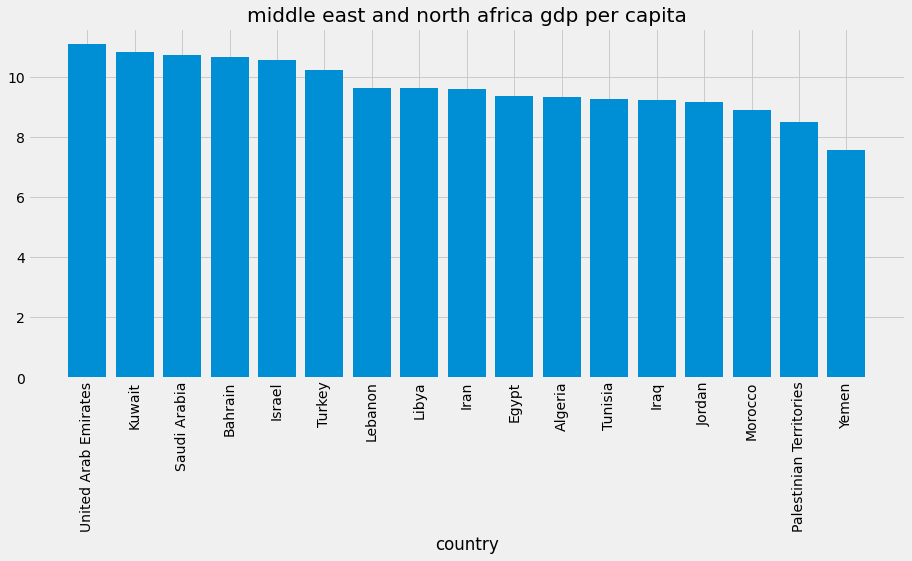

In [27]:
#middle east logged gdp per capita 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,6))
plt.style.use('fivethirtyeight')
country = M_E_N_Af['Country name']
lgdppcme = M_E_N_Af['Logged GDP per capita']
plt.bar(country,lgdppcme)
plt.title('middle east and north africa gdp per capita')
plt.xlabel('country')
plt.xticks(country, rotation='vertical')
plt.show()

In [28]:
#narrowing things down to East Africa
EA = dfr[dfr['Country name'].isin(['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi'])].sort_values(by='Logged GDP per capita',ascending=False)
EA

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
120,Kenya,Sub-Saharan Africa,4.607,0.072,4.747,4.466,8.361,0.688,60.704,0.779,0.287,0.825,2.43,0.603,0.508,0.385,0.483,0.375,0.073,2.180
141,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,0.183,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263
118,Uganda,Sub-Saharan Africa,4.636,0.073,4.780,4.493,7.677,0.781,56.101,0.709,0.122,0.855,2.43,0.364,0.718,0.240,0.398,0.267,0.054,2.596
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876


In [29]:
#selecting most relevant parameters to be analyzed in a heatmap
EAfrica_heatmap = EA[['Country name','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
EAfrica_heatmap

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
120,Kenya,8.361,0.688,60.704,0.779,0.287,0.825
141,Tanzania,7.876,0.702,57.999,0.833,0.183,0.577
118,Uganda,7.677,0.781,56.101,0.709,0.122,0.855
146,Rwanda,7.676,0.552,61.400,0.897,0.061,0.167
139,Burundi,6.635,0.490,53.400,0.626,-0.024,0.607


In [30]:
#first let's look at the correlation between the parameters
EAfrica_heatmap.corr()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Logged GDP per capita,1.000000,0.675829,0.796283,0.632633,0.932277,0.206622
Social support,0.675829,1.000000,0.162068,0.123288,0.694084,0.629935
Healthy life expectancy,0.796283,0.162068,1.000000,0.884453,0.583953,-0.378707
Freedom to make life choices,0.632633,0.123288,0.884453,1.000000,0.372912,-0.609525
Generosity,0.932277,0.694084,0.583953,0.372912,1.000000,0.468221
Perceptions of corruption,0.206622,0.629935,-0.378707,-0.609525,0.468221,1.000000


<AxesSubplot:>

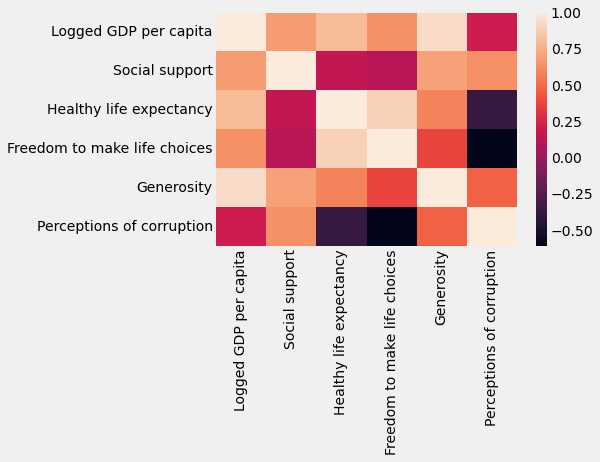

In [31]:
#looking at the heatmap
sns.heatmap(EAfrica_heatmap.corr())

In [32]:
#looking at east africa gdp
EA_gdp = EA.groupby(['Country name'])['Logged GDP per capita'].sum().sort_values(ascending=False).to_frame()
EA_gdp

,Logged GDP per capita
Country name,
Kenya,8.361
Tanzania,7.876
Uganda,7.677
Rwanda,7.676
Burundi,6.635


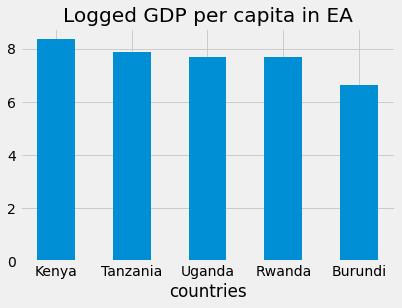

In [33]:
#a bar graph showing gdp per capita i east africa
plt.style.use('fivethirtyeight')
country = EA_gdp.index
lgdppc = EA_gdp['Logged GDP per capita']
plt.bar(country,lgdppc, width=0.5)
plt.title('Logged GDP per capita in EA')
plt.xlabel('countries')
plt.show()

In [34]:
dfr.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [35]:
dfr.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [36]:
 #life expectancy in East Africa
EALE = EA.groupby(['Country name'])['Healthy life expectancy'].sum().sort_values(ascending=False).to_frame()
EALE

,Healthy life expectancy
Country name,
Rwanda,61.400
Kenya,60.704
Tanzania,57.999
Uganda,56.101
Burundi,53.400


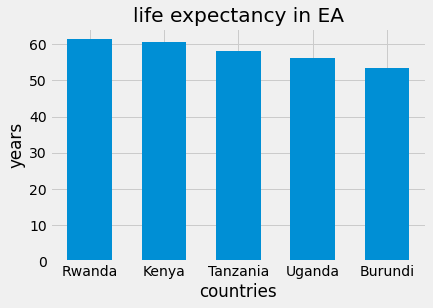

In [37]:
#bar graph showing life expectancy in EA
plt.style.use('fivethirtyeight')
country = EALE.index
life_expectancy = EALE['Healthy life expectancy']
plt.bar(country, life_expectancy, width=0.6)
plt.title('life expectancy in EA')
plt.xlabel('countries')
plt.ylabel('years')
plt.show()

In [38]:
#Freedom to make life choices in East Africa
EAfreedom = EA.groupby(['Country name'])['Freedom to make life choices'].sum().sort_values(ascending=False).to_frame()
EAfreedom

,Freedom to make life choices
Country name,
Rwanda,0.897
Tanzania,0.833
Kenya,0.779
Uganda,0.709
Burundi,0.626


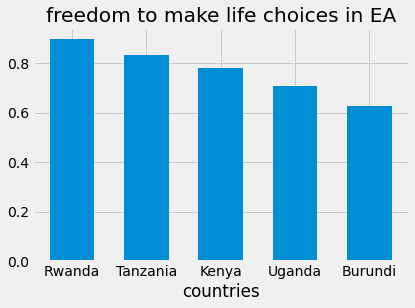

In [39]:
#a graph showing freedom to make life choices in east africa
plt.style.use('fivethirtyeight')
country = EAfreedom.index
freedom = EAfreedom['Freedom to make life choices']
plt.bar(country, freedom, width=0.6)
plt.title('freedom to make life choices in EA')
plt.xlabel('countries')
plt.show()

In [40]:
EA.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [41]:
#analysis of generosity in east africa
generosity = EA.groupby(['Country name'])['Generosity'].sum().sort_values(ascending=False).to_frame()
generosity

,Generosity
Country name,
Kenya,0.287
Tanzania,0.183
Uganda,0.122
Rwanda,0.061
Burundi,-0.024


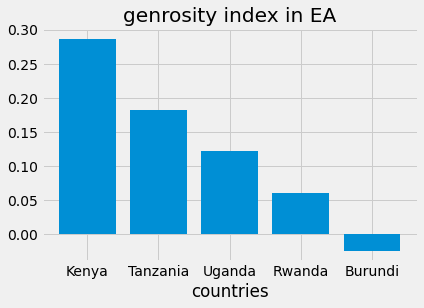

In [42]:
#generosity index in East Africa
plt.style.use('fivethirtyeight')
country = generosity.index
genEA = generosity['Generosity']
plt.bar(country, genEA)
plt.title('genrosity index in EA')
plt.xlabel('countries')
plt.show()

In [43]:
#looking at corruption perception in East Africa
corruption_perception = EA.groupby(['Country name'])['Perceptions of corruption'].sum().sort_values(ascending=False).to_frame()
corruption_perception

,Perceptions of corruption
Country name,
Uganda,0.855
Kenya,0.825
Burundi,0.607
Tanzania,0.577
Rwanda,0.167


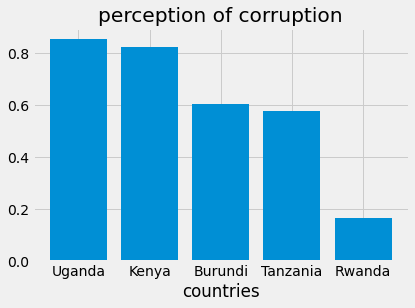

In [44]:
#bar graph showing corruption perception in EA
plt.style.use('fivethirtyeight')
country = corruption_perception.index
corruption = corruption_perception['Perceptions of corruption']
plt.bar(country, corruption)
plt.title('perception of corruption')
plt.xlabel('countries')
plt.show()